# Xprep Graph Tutorial

This is a sandbox to extaract an "at a glance" graph of the xprep table of statistics.

A lot of the focus on crystallography is taken up by building and refining a model against data that has been collectected. But how do we know that the data collected is good quality? How do we know that we have the correct Bravais Lattice and space group?

The ANSTO - Melbourne MX beamlines at the Australian Synchrotron use an autoprocessing stream to quickly supply results to chemical crystallography users. This process has a method that presents the graphical data of analisis of the diffraction, before any attempt at structure solution. This can also help guide if the data has been collected with "too much" beam or "too little". 

This graphic tool lives inside the processing system is here https://github.com/AustralianSynchrotron/mx-auto-dataset/blob/master/modules/CX_xprep_graphs.py. 


The code is broken into portions. 

### required to have a prp file and the jupyter notbook in the same place?
Tutor to open the prp in a text editor editor to introduce the process? Or a quick run through xprep for the XDS_ASCII.HKL?

## Tutorial tasks
* Import an xprep log file filename.prp 
* Parse it into pandas as an array
* Print the table 

In [1]:
import re
import os
import pandas as pd
import matplotlib
# Path needed for widows file system
from pathlib import Path 
#matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# get the student to put a known prp file local to the notebook for simplicity?
input_path = Path(r'C:\Users\New\prp_files\RuBy_att_sad\62_Ruby_98.prp')
project_dir = os.getcwd()

with open(input_path) as file:
    contents = file.read()
    
# Search file for beginning and ending of stats table
x = re.search(" Inf",contents)
y = re.search("Merged",contents)

if x is None and y is None:
    pass
else:
    stats_table = contents[x.start():y.start()].split('\n')

    # Split the rows of the stats table into individual elements
    n = 0
    data = []
    for item in stats_table:
        data.append(stats_table[n].split())
        n+=1

    # Store the stats table as a pandas dataframe and remove last 5 rows (are empty or contain punctuation)
    df = pd.DataFrame(data,columns=['Resolution', 'dash', 'Resolution High',
                                    '#`Data','#Theory','%Complete', 'Redundancy',
                                    'Mean I','Mean I/s','R(int)','Rsigma'],dtype=float)
    df.drop(df.tail(5).index,inplace=True)

# return a table
df


,Resolution,dash,Resolution High,#`Data,#Theory,%Complete,Redundancy,Mean I,Mean I/s,R(int),Rsigma
0,Inf,-,1.93,276.0,276.0,100.0,12.61,25.0,20.31,0.0599,0.0480
1,1.93,-,1.51,277.0,277.0,100.0,12.61,11.7,21.53,0.0671,0.0372
2,1.51,-,1.31,277.0,277.0,100.0,13.71,9.3,21.97,0.0773,0.0354
3,1.31,-,1.19,277.0,277.0,100.0,13.90,6.7,20.61,0.0822,0.0365
4,1.19,-,1.10,279.0,279.0,100.0,12.77,5.1,19.15,0.0889,0.0394
5,1.10,-,1.03,292.0,292.0,100.0,12.13,4.3,17.61,0.1026,0.0421
6,1.03,-,0.98,272.0,272.0,100.0,12.94,3.9,18.11,0.1089,0.0420
7,0.98,-,0.93,328.0,328.0,100.0,13.11,3.5,17.38,0.1102,0.0414
8,0.93,-,0.89,318.0,318.0,100.0,12.81,2.6,15.10,0.1254,0.0461
9,0.89,-,0.85,373.0,373.0,100.0,11.92,2.3,14.03,0.1326,0.0491


## Why xprep?

The use of xprep was taken on board as while it is a product from Bruker, it is a very fast a powerful tool for lattice determination and space group analysis. 

The table formed in xprep is not unique. There is a similar table in xds ine the file CORRECTION.LP and in CrysalysPro the file is called filename_red.sum. 

The above code could be addapted to import those table

## Tutorial tasks

* Plot R(int)  against res. - Put a maximum cutoff on R(int) = 0.50, Rsigma = 0.50
* Plot completeness on second table?
* Plot Mean I/s on fist plot
    

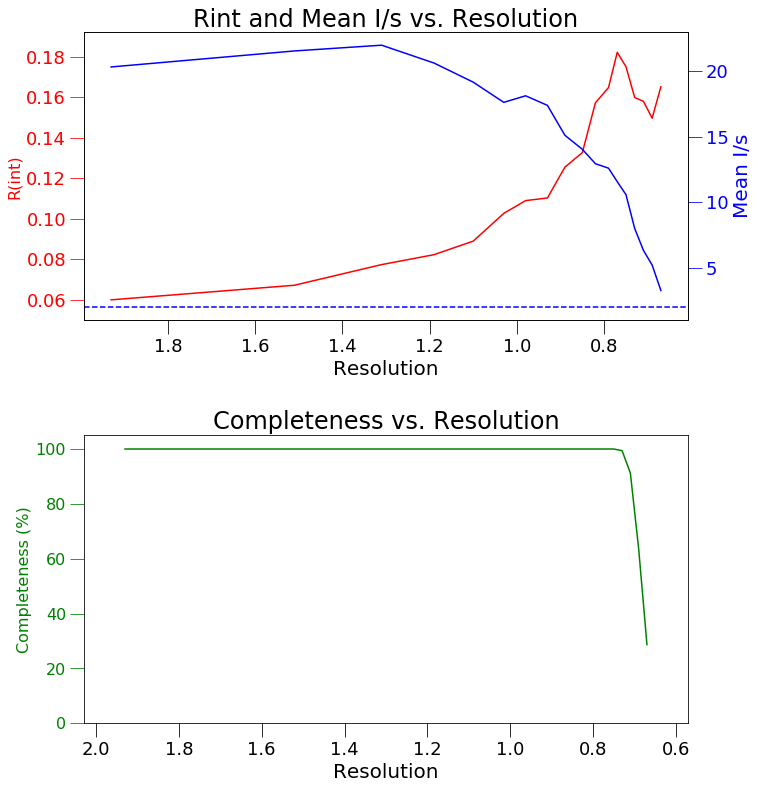

In [2]:
    x = df['Resolution High']

    y1 = df['R(int)']
    y2 = df['Mean I/s']
    y3 = df['%Complete']


# Set up the sub plot arrangement (left, right or top bottom)
# Setting up for two comparative plot spaces
    fig, (ax1, ax2) = plt.subplots(2, 1)

    
# First plot - Rint and Mean I/s vs. Resolution
    ax1.plot(x, y1, 'r', x, y2, 'b')
    xaxis = x
    yaxis1 = [float(i) for i in y1] 
    yaxis2 = [float(i) for i in y2]
    
    ax1.set_title('Rint and Mean I/s vs. Resolution', size=24)
    ax1.set_xlabel('Resolution', size=20)

# Set up parameters for the Rint graph
    ax1.set_ylabel('R(int)', color='r', size=16)
    ax1.tick_params('x', size=14, labelsize=18)
    ax1.tick_params('y', colors='r', size=14, labelsize=18)
    
    # Determine what scaling to use for the Rint graph
    if y1.max() > 0.5:
        ax1.set_ylim(0, 0.5)
    else:
        ax1.set_ylim(y1.min() - 0.01, y1.max() + 0.01)
        
# Set up parameters for overlaid Mean I/s graph
    ax1b = ax1.twinx()
    ax1b.plot(xaxis, yaxis2, 'blue', label='Mean I/s', color='b')
    ax1b.set_ylabel('Mean I/s', color='b', size=20)
    ax1b.tick_params('y', colors='b', size=14, labelsize=18)
    if y2.min() < 2.0:
        plt.axhline(y=2.0, color='black', linestyle='--')

# draw a cut off line at 2 I/s, the cutoff for shelxl refinements.
    plt.axhline(y=2.0, color='blue', linestyle='--')
    plt.gca().invert_xaxis()
    
# Second plot - Completeness vs. Resolution
    ax2.plot(x, y3, 'g')
    xaxis = x
    yaxis = [float(i) for i in y3] 
    ax2.set_title('Completeness vs. Resolution', size=24)
    ax2.set_xlabel('Resolution', size=20)
    ax2.set_ylabel('Completeness (%)', color='g', size=16)
    ax2.tick_params('x', size=14, labelsize=18)
    ax2.tick_params('y', colors='g',size=14, labelsize=16)
    ax2.set_xlim(df['Resolution High'].max()+0.1, df['Resolution High'].min()-0.1)
    ax2.set_ylim(0,105)

# General formatting and outputting graphs to a file
    plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2.5, wspace=0.2, hspace=0.4)
    #plt.savefig(os.path.join(project_dir,'xprep.png'),bbox_inches='tight',pad_inches=0.1)